In [2]:
import mglearn
import matplotlib.pyplot as plt

X.shape:(26, 2)


/home/bio_kang/software/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


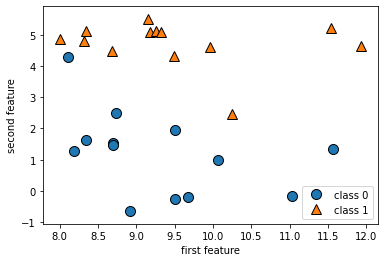

In [3]:
X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:,0], X[:,1], y)

plt.legend(['class 0', 'class 1'], loc=4)
plt.xlabel('first feature')
plt.ylabel('second feature')
print("X.shape:{}".format(X.shape))

Text(0, 0.5, 'target')

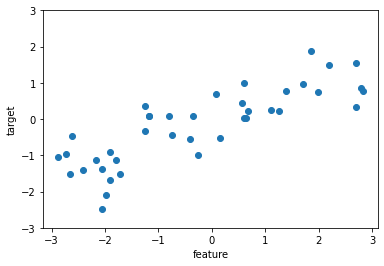

In [3]:
import mglearn
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('feature')
plt.ylabel('target')

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
print(cancer.data.shape)

(569, 30)


In [8]:
print(cancer.target_names)

['malignant' 'benign']


In [9]:
import numpy as np
np.bincount(cancer.target)

array([212, 357])

In [10]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [12]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


/home/bio_kang/software/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


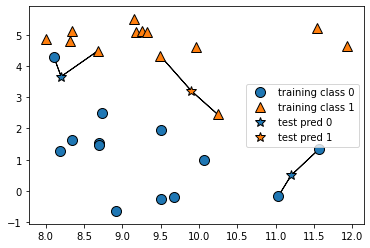

In [16]:
mglearn.plots.plot_knn_classification(n_neighbors=2)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X,y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
clf.predict(X_test)

/home/bio_kang/software/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


array([1, 0, 1, 0, 1, 0, 0])

In [18]:
clf.score(X_test,y_test)

0.8571428571428571

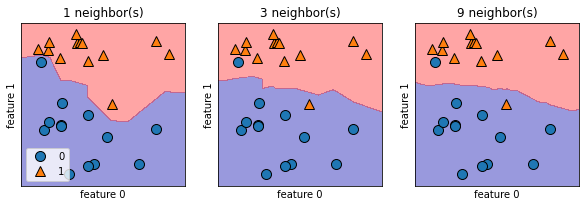

In [29]:
import mglearn

fig, axes = plt.subplots(1, 3,figsize=(10,3))

for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)

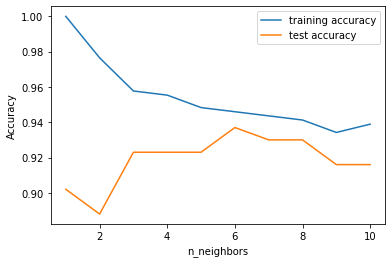

In [34]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target,random_state=66)

training_accuracy = []
test_accuracy = []

for n_neighbors in range(1,11):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(range(1,11), training_accuracy, label="training accuracy")
plt.plot(range(1,11), test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()


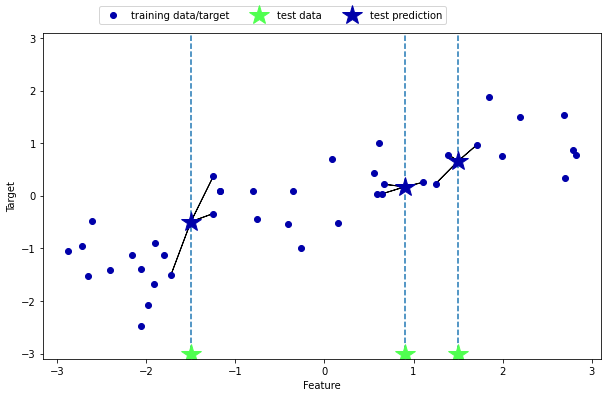

In [39]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [64]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
print(reg.predict((X_test)))

[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [47]:
print(reg.score(X_test, y_test))

0.8344172446249605


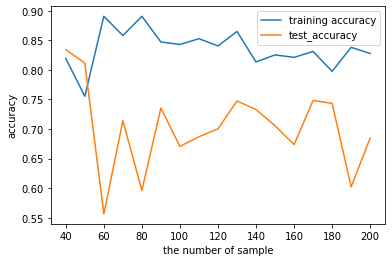

In [62]:
training_accuracy = []
test_accuracy = []

for num in range(40,210,10):
    X,y = mglearn.datasets.make_wave(n_samples=num)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    reg = KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)
    training_accuracy.append(reg.score(X_train, y_train))
    test_accuracy.append(reg.score(X_test, y_test))

plt.plot(range(40,210,10), training_accuracy, label="training accuracy")
plt.plot(range(40,210,10), test_accuracy, label='test_accuracy')
plt.xlabel('the number of sample')
plt.ylabel('accuracy')
plt.legend()

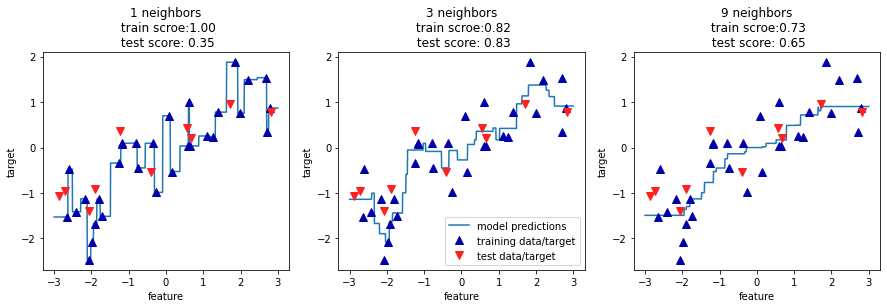

In [66]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors,ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train, y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbors\n train scroe:{:.2f}\n test score: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel('feature')
    ax.set_ylabel('target')

axes[1].legend(['model predictions','training data/target','test data/target'], loc='best')

linear model

w[0]: 0.393906  b: -0.031804


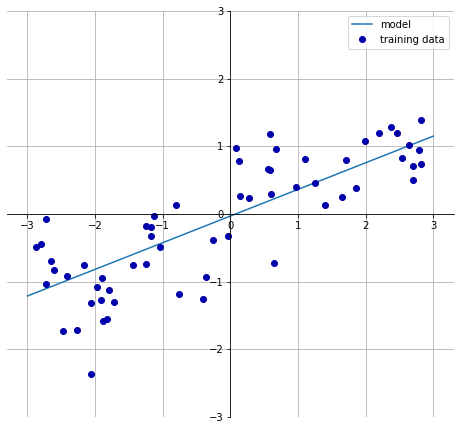

In [67]:
mglearn.plots.plot_linear_regression_wave()

普通最小二乘法(ordinary least squares, OLS)是回归问题最简单也最经典的线性方法。线性回归寻找参数 w 和 b，使得对训练集的预测值与真实的回归目标值 y之间的均方误差最小。均方误差（mean squared error）是预测值与真实值之差的平方和除以样本数。线性回归没有参数，这是一个优点，但也因此无法控制模型的复杂度。

In [69]:
from sklearn.linear_model import LinearRegression

X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train,y_train)
# 斜率
print(lr.coef_)
# 截距
print(lr.intercept_)

[0.39390555]
-0.031804343026759746


In [70]:
print(lr.score(X_train, y_train))
print(lr.score(X_test,y_test))

0.6700890315075756
0.65933685968637


In [72]:
X,y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9448313975211591
0.7758378393351721


岭回归(ridge regression)

In [75]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

0.8700969775259918
0.8145421818415555


In [76]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(ridge10.score(X_train, y_train))
print(ridge10.score(X_test, y_test))

0.7669532344928074
0.7279392273706593


In [77]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(ridge01.score(X_train, y_train))
print(ridge01.score(X_test, y_test))

0.9174870139232212
0.8246491875314651


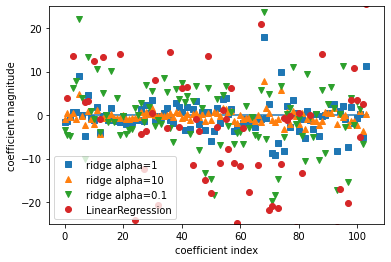

In [78]:
plt.plot(ridge.coef_, 's', label='ridge alpha=1')
plt.plot(ridge10.coef_, '^', label='ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label='ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label = 'LinearRegression')
plt.xlabel('coefficient index')
plt.ylabel('coefficient magnitude')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

/home/bio_kang/software/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

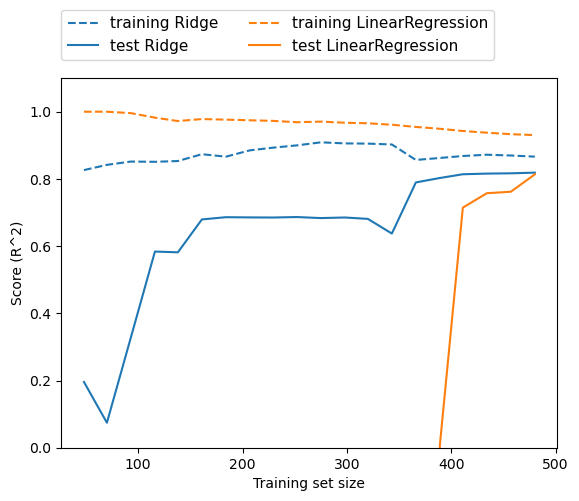

In [4]:
 import mglearn
 import pandas as pd
 import numpy as np

 mglearn.plots.plot_ridge_n_samples()

Lasso

In [80]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))
np.sum(lasso.coef_ !=0)

0.26783778369518485
0.2599232118344591


3

In [81]:
lasso_001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print(lasso_001.score(X_train, y_train))
print(lasso_001.score(X_test, y_test))
print(np.sum(lasso_001.coef_ != 0))

0.8864717420585475
0.8036004116583613
34


In [82]:
lasso_00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print(lasso_00001.score(X_train, y_train))
print(lasso_00001.score(X_test, y_test))
print(np.sum(lasso_00001.coef_ != 0))

0.9435815252488567
0.8080525356174126
95


Text(0, 0.5, 'coefficient mgnitude')

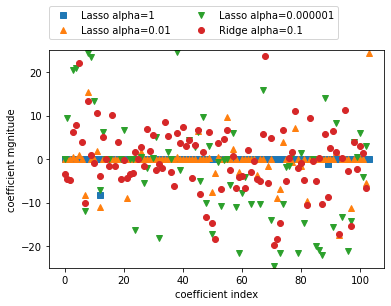

In [83]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso_001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso_00001.coef_, 'v', label='Lasso alpha=0.000001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel('coefficient index')
plt.ylabel('coefficient mgnitude')

/home/bio_kang/software/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/home/bio_kang/software/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


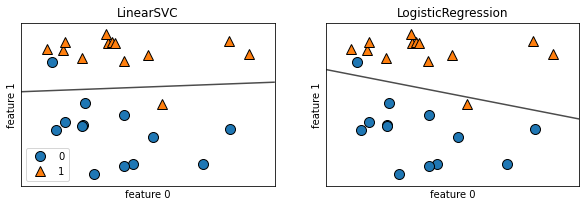

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False,eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend()

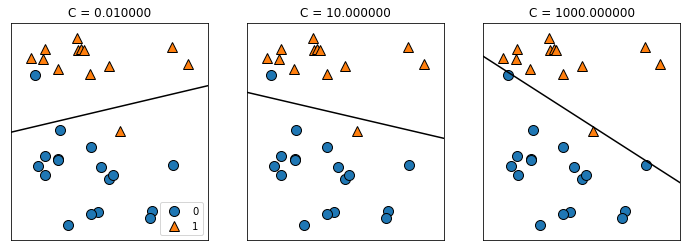

In [87]:
mglearn.plots.plot_linear_svc_regularization()

In [88]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target,random_state=42)
logred = LogisticRegression().fit(X_train, y_train)
print(logred.score(X_train,y_train))
print(logred.score(X_test, y_test))

0.9436619718309859
0.958041958041958


/home/bio_kang/software/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [90]:
logred100 = LogisticRegression(C=100, max_iter=100000).fit(X_train,y_train)
print(logred100.score(X_train, y_train))
print(logred100.score(X_test, y_test))

0.9835680751173709
0.972027972027972


In [91]:
logred001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print(logred001.score(X_train, y_train))
print(logred001.score(X_test, y_test))

0.9366197183098591
0.9300699300699301


/home/bio_kang/software/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


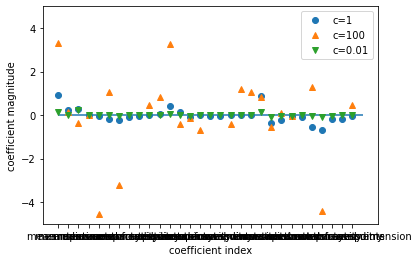

In [93]:
plt.plot(logred.coef_.T, 'o',label='c=1')
plt.plot(logred100.coef_.T, '^',label='c=100')
plt.plot(logred001.coef_.T, 'v',label='c=0.01')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel('coefficient index')
plt.ylabel('coefficient magnitude')
plt.legend()

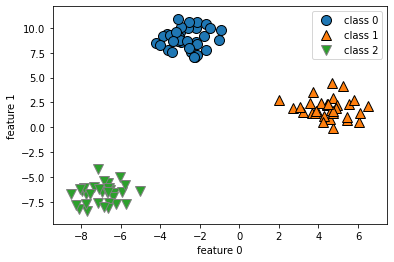

In [95]:
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2'])

In [96]:
linear_svm = LinearSVC().fit(X,y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


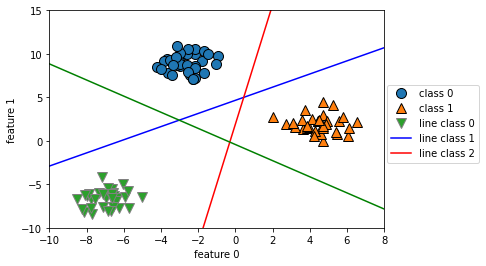

In [97]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b','r','g']):
    plt.plot(line,-(line*coef[0] + intercept)/coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'line class 0', 'line class 1', 'line class 2'], loc=(1.01,0.3))

Text(0, 0.5, 'Feature 1')

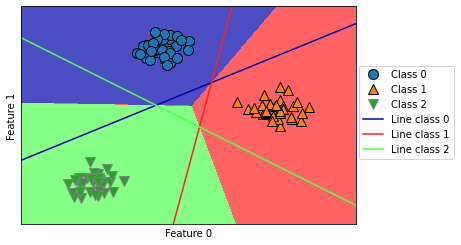

In [98]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])